In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [148]:
df = pd.read_csv('data/confounder2021.csv').drop(columns=['Unnamed: 0'])
print(df.shape)
df

(5319, 9)


,ID,age,sex,OA,bmi,level_education,N_kids,has_kid,N_disease
0,1000007,71,1,0,16.852522,3,0.0,0.0,1
1,1000018,83,0,0,25.249337,2,1.0,1.0,1
2,1000020,72,1,0,30.119376,1,2.0,1.0,3
3,1000024,80,1,0,37.109375,1,3.0,1.0,4
4,1000319,98,1,0,22.959088,1,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
5314,4005996,47,0,0,25.507493,1,2.0,1.0,1
5315,4005997,76,1,1,25.402816,0,2.0,1.0,3
5316,4005998,71,0,1,17.592593,3,2.0,1.0,3
5317,4005999,78,0,1,26.827421,3,4.0,1.0,3


In [151]:
# unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n") 

Unique values in column 'ID':
[1000007 1000018 1000020 ... 4005998 4005999 4006002]

----------------------------------------

Unique values in column 'age':
[71 83 72 80 98 95 79 87 82 91 93 78 76 86 85 94 84 81 90 77 74 70 89 67
 68 75 73 69 66 64 65 58 59 60 62 63 61 92 88 56 53 55 54 57 52 49 51 50
 47 48 46]

----------------------------------------

Unique values in column 'sex':
[1 0]

----------------------------------------

Unique values in column 'OA':
[0 1]

----------------------------------------

Unique values in column 'bmi':
[16.8525225  25.2493372  30.11937557 ... 30.02659498 20.37037037
 17.59259259]

----------------------------------------

Unique values in column 'level_education':
[3 2 1 0]

----------------------------------------

Unique values in column 'N_kids':
[0. 1. 2. 3. 4.]

----------------------------------------

Unique values in column 'has_kid':
[0. 1.]

----------------------------------------

Unique values in column 'N_disease':
[ 1  3  4  2  8  

In [152]:
df

,ID,age,sex,OA,bmi,level_education,N_kids,has_kid,N_disease
0,1000007,71,1,0,16.852522,3,0.0,0.0,1
1,1000018,83,0,0,25.249337,2,1.0,1.0,1
2,1000020,72,1,0,30.119376,1,2.0,1.0,3
3,1000024,80,1,0,37.109375,1,3.0,1.0,4
4,1000319,98,1,0,22.959088,1,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
5314,4005996,47,0,0,25.507493,1,2.0,1.0,1
5315,4005997,76,1,1,25.402816,0,2.0,1.0,3
5316,4005998,71,0,1,17.592593,3,2.0,1.0,3
5317,4005999,78,0,1,26.827421,3,4.0,1.0,3


In [ ]:
def summarize_dataframe(df):
    """
    Summarize a DataFrame by calculating:
    - Mean and SD for continuous variables
    - Counts and percentages for categorical variables
    """
    summary = {}
    
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            unique_values = df[column].nunique()
            if unique_values > 10:  
                mean = df[column].mean()
                std = df[column].std()
                summary[column] = {
                    'Mean': round(mean, 2),
                    'SD': round(std, 2)
                }
            else: 
                counts = df[column].value_counts()
                percentages = (counts / len(df) * 100).round(2)
                summary[column] = {
                    'Counts': counts.to_dict(),
                    'Percentages': percentages.to_dict()
                }
        else:
            counts = df[column].value_counts()
            percentages = (counts / len(df) * 100).round(2)
            summary[column] = {
                'Counts': counts.to_dict(),
                'Percentages': percentages.to_dict()
            }
    
    return pd.DataFrame(summary).transpose()

summary_df = summarize_dataframe(df)


In [ ]:
def create_summary_table(df):
    groups = df.groupby(['sex', 'has_kid'])
    table_data = {
        "Characteristic": [
            "Number of Participants (n)", 
            "Age (mean ± SD)", 
            "Education (Counts, %)", 
            "Number of Diseases (mean ± SD)"
        ]
    }
    
    group_labels = ["Men without Kids", "Women without Kids", "Women with Kids", "Men with Kids"]
    
    for label, (sex, has_kid) in zip(group_labels, [(1, 0), (0, 0), (0, 1), (1, 1)]):
        group = groups.get_group((sex, has_kid))
        
        # Number of participants
        n_participants = len(group)
        
        # Age
        age_mean = group['age'].mean()
        age_sd = group['age'].std()
        age_summary = f"{age_mean:.2f} ± {age_sd:.2f}"
        
        # Education
        education_counts = group['level_education'].value_counts()
        education_percentages = (education_counts / n_participants * 100).round(2)
        education_summary = "; ".join([f"{level}: {count} ({percent}%)" 
                                       for level, count, percent in zip(
                                           education_counts.index, 
                                           education_counts.values, 
                                           education_percentages.values)])
        
        # Number of Diseases
        disease_mean = group['N_disease'].mean()
        disease_sd = group['N_disease'].std()
        disease_summary = f"{disease_mean:.2f} ± {disease_sd:.2f}"
        
  
        table_data[label] = [
            n_participants, 
            age_summary, 
            education_summary, 
            disease_summary
        ]

    table_df = pd.DataFrame(table_data)
    
    return table_df

summary_table = create_summary_table(df)
summary_table

,Characteristic,Men without Kids,Women without Kids,Women with Kids,Men with Kids
0,Number of Participants (n),319,313,2328,2359
1,Age (mean ± SD),65.67 ± 10.27,66.52 ± 9.87,69.65 ± 10.52,68.25 ± 10.25
2,"Education (Counts, %)",1: 150 (47.02%); 3: 109 (34.17%); 2: 46 (14.42...,1: 142 (45.37%); 3: 118 (37.7%); 2: 49 (15.65%...,3: 978 (42.01%); 1: 949 (40.76%); 2: 366 (15.7...,1: 1262 (53.5%); 3: 597 (25.31%); 2: 326 (13.8...
3,Number of Diseases (mean ± SD),2.22 ± 1.52,2.23 ± 1.57,2.30 ± 1.65,2.24 ± 1.71


### Analysis

#### 1. Risk of OA in Men without kid vs. Women without kid

In [157]:
# 1. Men without kid vs. Women without kid
men_without_kid = df[(df['sex'] == 0) & (df['has_kid'] == 0)]
women_without_kid = df[(df['sex'] == 1) & (df['has_kid'] == 0)]

print(f"Number of men without kids: {len(men_without_kid)}")
print(f"Number of women without kids: {len(women_without_kid)}")

men_without_kid_with_oa = men_without_kid[men_without_kid['OA'] == 1]
print(f"Number of men without kids who have OA: {len(men_without_kid_with_oa)}")

women_without_kid_with_oa = women_without_kid[women_without_kid['OA'] == 1]
print(f"Number of women without kids who have OA: {len(women_without_kid_with_oa)}")

Number of men without kids: 313
Number of women without kids: 319
Number of men without kids who have OA: 116
Number of women without kids who have OA: 140


Optimization terminated successfully.
         Current function value: 0.672592
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                  632
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                0.003585
Time:                        12:54:45   Log-Likelihood:                -425.08
converged:                       True   LL-Null:                       -426.61
Covariance Type:            nonrobust   LLR p-value:                   0.08032
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5296      0.117     -4.525      0.000      -0.759      -0.300
sex            0.2839      0.

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/3054088392.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_kids['predicted_prob'] = result.predict(X)


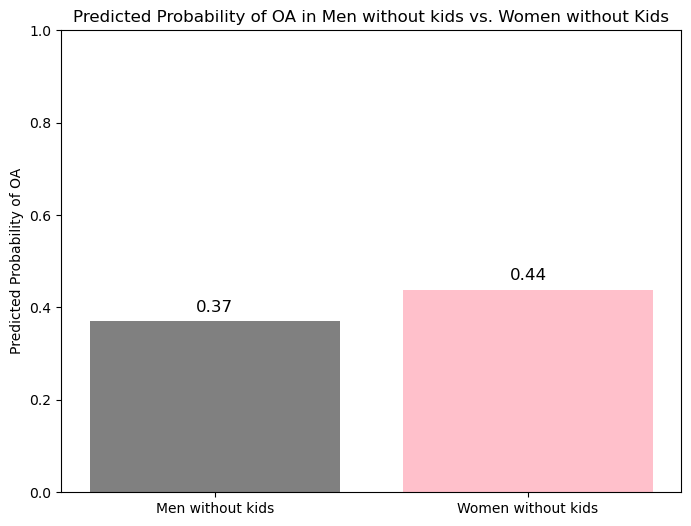

Odds ratio for sex (men without kids vs. women without kids): 0.2838701544001737
P-value for sex: 0.08077080967740385
There is no statistically significant difference in the risk of OA between men and women without kids.


In [158]:
df_no_kids = df[(df['has_kid'] == 0)]


y = df_no_kids['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: sex (prognostic factor) 
X = df_no_kids[['sex']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


df_no_kids['predicted_prob'] = result.predict(X)

mean_prob_men = df_no_kids[df_no_kids['sex'] == 0]['predicted_prob'].mean()
mean_prob_women = df_no_kids[df_no_kids['sex'] == 1]['predicted_prob'].mean()


plt.figure(figsize=(8, 6))


categories = ['Men without kids', 'Women without kids']
probs = [mean_prob_men, mean_prob_women]

plt.bar(categories, probs, color=['grey', 'pink'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Men without kids vs. Women without Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


odds_ratio = result.params['sex']
p_value = result.pvalues['sex']

print(f"Odds ratio for sex (men without kids vs. women without kids): {odds_ratio}")
print(f"P-value for sex: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between men and women without kids.")
else:
   print("There is no statistically significant difference in the risk of OA between men and women without kids.")

#### 2. Risk of OA in Women without kid vs. Women with kids

In [ ]:
# 2. Women without kid vs. Women with kid
women_without_kid = df[(df['sex'] == 1) & (df['has_kid'] == 0)]
women_with_kid = df[(df['sex'] == 1) & (df['has_kid'] == 1)]

print(f"Number of women without kids: {len(women_without_kid)}")
print(f"Number of women with kids: {len(women_with_kid)}")


women_without_kid_with_oa = women_without_kid[women_without_kid['OA'] == 1]
print(f"Number of women without kids who have OA: {len(women_without_kid_with_oa)}")


women_with_kid_with_oa = women_with_kid[women_with_kid['OA'] == 1]
print(f"Number of women with kids who have OA: {len(women_with_kid_with_oa)}")


Number of women without kids: 319
Number of women with kids: 2359
Number of women without kids who have OA: 140
Number of women with kids who have OA: 1200


Optimization terminated successfully.
         Current function value: 0.690797
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2678
Model:                          Logit   Df Residuals:                     2675
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                0.003390
Time:                        12:54:45   Log-Likelihood:                -1850.0
converged:                       True   LL-Null:                       -1856.2
Covariance Type:            nonrobust   LLR p-value:                  0.001851
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0529      0.134     -0.394      0.693      -0.316       0.210
has_kid       

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/4069598759.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['predicted_prob'] = result.predict(X)


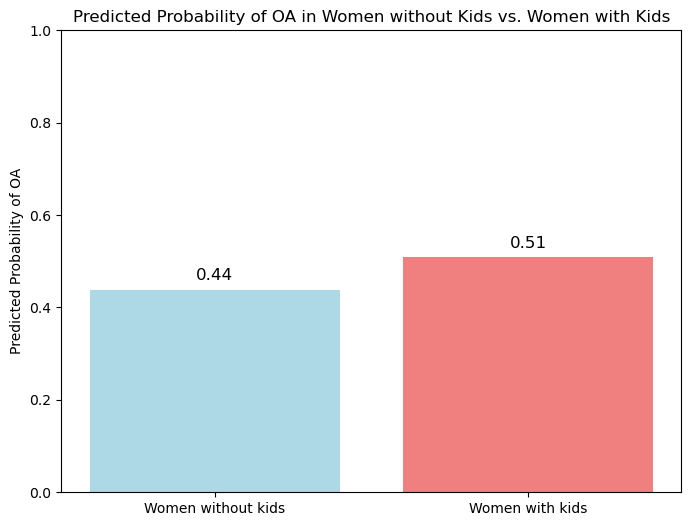

Odds ratio for having kids (Women without kids vs. Women with kids): 0.25812665488656894
P-value for having kids: 0.03224705397921316
There is a statistically significant difference in the risk of OA between women without kids and women with kids.


In [ ]:
df_women = df[(df['sex'] == 1)]

# Define the outcome variable (OA) and independent variables (has_kid, confounders)
y = df_women['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)


X = df_women[['has_kid', 'level_education']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())


df_women['predicted_prob'] = result.predict(X)


mean_prob_without_kid = df_women[df_women['has_kid'] == 0]['predicted_prob'].mean()
mean_prob_with_kid = df_women[df_women['has_kid'] == 1]['predicted_prob'].mean()


plt.figure(figsize=(8, 6))


categories = ['Women without kids', 'Women with kids']
probs = [mean_prob_without_kid, mean_prob_with_kid]

plt.bar(categories, probs, color=['lightblue', 'lightcoral'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Women without Kids vs. Women with Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


odds_ratio = result.params['has_kid']
p_value = result.pvalues['has_kid']

print(f"Odds ratio for having kids (Women without kids vs. Women with kids): {odds_ratio}")
print(f"P-value for having kids: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between women without kids and women with kids.")
else:
    print("There is no statistically significant difference in the risk of OA between women without kids and women with kids.")

#### 3. Risk of OA in Men without kid vs. Men with kid

In [ ]:
# 3. Men without kid vs. Men with kid
men_without_kid = df[(df['sex'] == 0) & (df['has_kid'] == 0)]
men_with_kid = df[(df['sex'] == 0) & (df['has_kid'] == 1)]

print(f"Number of men without kids: {len(men_without_kid) }")
print(f"Number of men with kids: {len(men_with_kid)}")

men_without_kid_with_oa = men_without_kid[men_without_kid['OA'] == 1]
print(f"Number of men without kids who have OA: {len(men_without_kid_with_oa)}")


men_with_kid_with_oa = men_with_kid[men_with_kid['OA'] == 1]
print(f"Number of men with kids who have OA: {len(men_with_kid_with_oa)}")


Number of men without kids: 313
Number of men with kids: 2328
Number of men without kids who have OA: 116
Number of men with kids who have OA: 1005


Optimization terminated successfully.
         Current function value: 0.653655
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2641
Model:                          Logit   Df Residuals:                     2636
Method:                           MLE   Df Model:                            4
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.04113
Time:                        12:54:46   Log-Likelihood:                -1726.3
converged:                       True   LL-Null:                       -1800.3
Covariance Type:            nonrobust   LLR p-value:                 5.233e-31
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2755      0.297     -7.666      0.000      -2.857      -1.694
has_kid       

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/3077883617.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['predicted_prob'] = result.predict(X)


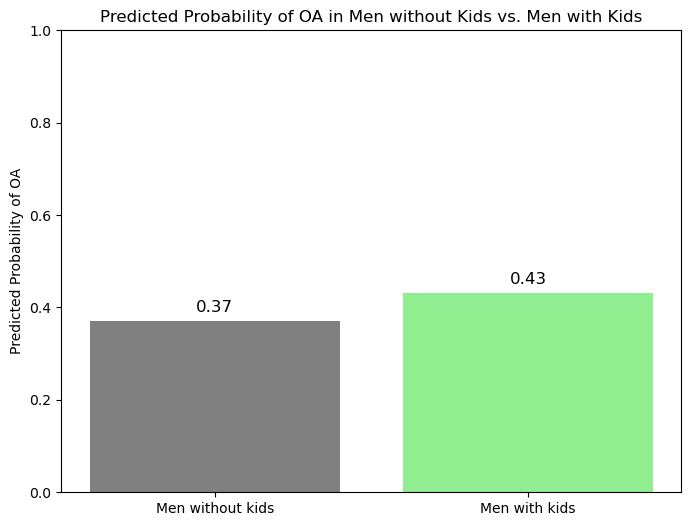

Odds ratio for having kids (Men without kids vs. Men with kids): 0.18967980436700396
P-value for having kids: 0.13806770588665254
There is no statistically significant difference in the risk of OA between men without kids and men with kids.


In [ ]:
df_men = df[(df['sex'] == 0)]

y = df_men['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: has_kid (prognostic factor) + confounders (age, bmi, level_education, N_disease)
X = df_men[['has_kid', 'age', 'level_education', 'N_disease']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_men['predicted_prob'] = result.predict(X)

mean_prob_without_kid = df_men[df_men['has_kid'] == 0]['predicted_prob'].mean()
mean_prob_with_kid = df_men[df_men['has_kid'] == 1]['predicted_prob'].mean()

plt.figure(figsize=(8, 6))

categories = ['Men without kids', 'Men with kids']
probs = [mean_prob_without_kid, mean_prob_with_kid]

plt.bar(categories, probs, color=['grey', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Men without Kids vs. Men with Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


odds_ratio = result.params['has_kid']
p_value = result.pvalues['has_kid']

print(f"Odds ratio for having kids (Men without kids vs. Men with kids): {odds_ratio}")
print(f"P-value for having kids: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between men without kids and men with kids.")
else:
    print("There is no statistically significant difference in the risk of OA between men without kids and men with kids.")

#### 4. Risk of OA in Men without kid vs. Women with kid

In [ ]:
# 4. Men without kid vs. Women with kid
men_without_kid = df[(df['sex'] == 0) & (df['has_kid'] == 0)]
women_with_kid = df[(df['sex'] == 1) & (df['has_kid'] == 1)]

print(f"Number of men without kids: {len(men_without_kid)}")
print(f"Number of women with kids: {len(women_with_kid)}")


men_without_kid_with_oa = men_without_kid[men_without_kid['OA'] == 1]
print(f"Number of men without kids who have OA: {len(men_without_kid_with_oa)}")


women_with_kid_with_oa = women_with_kid[women_with_kid['OA'] == 1]
print(f"Number of women with kids who have OA: {len(women_with_kid_with_oa)}")

Number of men without kids: 313
Number of women with kids: 2359
Number of men without kids who have OA: 116
Number of women with kids who have OA: 1200


Optimization terminated successfully.
         Current function value: 0.642224
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2672
Model:                          Logit   Df Residuals:                     2666
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.07332
Time:                        12:54:46   Log-Likelihood:                -1716.0
converged:                       True   LL-Null:                       -1851.8
Covariance Type:            nonrobust   LLR p-value:                 1.309e-56
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8547      0.436    -11.140      0.000      -5.709      -4.001
sex           

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/2354068802.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['predicted_prob'] = result.predict(X)


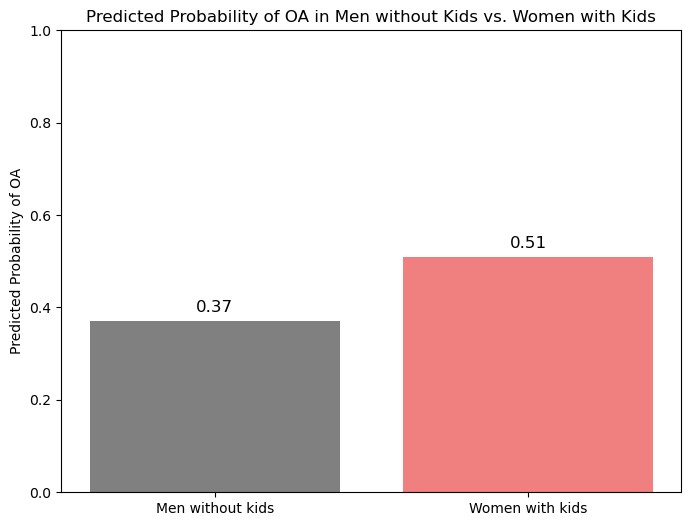

Odds ratio for sex (Men without kids vs. Women with kids): 0.6602658793221489
P-value for sex: 4.814927418511905e-07
There is a statistically significant difference in the risk of OA between men without kids and women with kids.


In [ ]:
df_filtered = df[((df['sex'] == 0) & (df['has_kid'] == 0)) | ((df['sex'] == 1) & (df['has_kid'] == 1))]

y = df_filtered['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: sex (men vs. women) + confounders (age, bmi, level_education, N_disease)
X = df_filtered[['sex', 'age', 'bmi', 'level_education', 'N_disease']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())


df_filtered['predicted_prob'] = result.predict(X)

mean_prob_men_without_kid = df_filtered[df_filtered['sex'] == 0]['predicted_prob'].mean()
mean_prob_women_with_kid = df_filtered[df_filtered['sex'] == 1]['predicted_prob'].mean()


plt.figure(figsize=(8, 6))


categories = ['Men without kids', 'Women with kids']
probs = [mean_prob_men_without_kid, mean_prob_women_with_kid]

plt.bar(categories, probs, color=['grey', 'lightcoral'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Men without Kids vs. Women with Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


odds_ratio = result.params['sex']
p_value = result.pvalues['sex']

print(f"Odds ratio for sex (Men without kids vs. Women with kids): {odds_ratio}")
print(f"P-value for sex: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between men without kids and women with kids.")
else:
    print("There is no statistically significant difference in the risk of OA between men without kids and women with kids.")

#### 5. Risk of OA in Men with kid vs. Women with kid

In [ ]:
# 5. Men with kid vs. Women with kid
men_with_kid = df[(df['sex'] == 0) & (df['has_kid'] == 1)]
women_with_kid = df[(df['sex'] == 1) & (df['has_kid'] == 1)]

print(f"Number of men with kids: {len(men_with_kid)}")
print(f"Number of women with kids: {len(women_with_kid)}")

men_with_kid_with_oa = men_with_kid[men_with_kid['OA'] == 1]
print(f"Number of men with kids who have OA: {len(men_with_kid_with_oa)}")

women_with_kid_with_oa = women_with_kid[women_with_kid['OA'] == 1]
print(f"Number of women with kids who have OA: {len(women_with_kid_with_oa)}")

Number of men with kids: 2328
Number of women with kids: 2359
Number of men with kids who have OA: 1005
Number of women with kids who have OA: 1200


Optimization terminated successfully.
         Current function value: 0.651329
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 4687
Model:                          Logit   Df Residuals:                     4681
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.05796
Time:                        12:54:46   Log-Likelihood:                -3052.8
converged:                       True   LL-Null:                       -3240.6
Covariance Type:            nonrobust   LLR p-value:                 5.306e-79
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.0682      0.326    -12.498      0.000      -4.706      -3.430
sex           

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/755985501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['predicted_prob'] = result.predict(X)


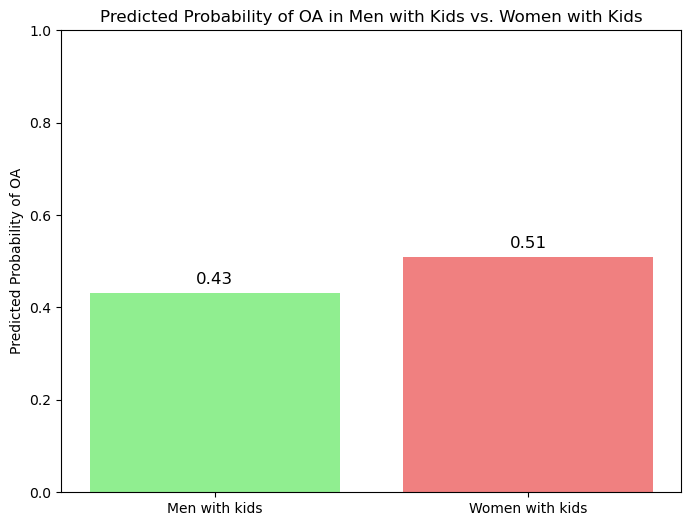

Odds ratio for sex (Men with kids vs. Women with kids): 0.41783877359970584
P-value for sex: 4.690428155293496e-11
There is a statistically significant difference in the risk of OA between men with kids and women with kids.


In [ ]:
df_filtered = df[(df['sex'] == 0) & (df['has_kid'] == 1) | (df['sex'] == 1) & (df['has_kid'] == 1)]


y = df_filtered['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: sex (men vs. women) + confounders (age, bmi, level_education, N_disease)
X = df_filtered[['sex', 'age', 'bmi', 'level_education', 'N_disease']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())


df_filtered['predicted_prob'] = result.predict(X)


mean_prob_men_with_kid = df_filtered[df_filtered['sex'] == 0]['predicted_prob'].mean()
mean_prob_women_with_kid = df_filtered[df_filtered['sex'] == 1]['predicted_prob'].mean()

plt.figure(figsize=(8, 6))


categories = ['Men with kids', 'Women with kids']
probs = [mean_prob_men_with_kid, mean_prob_women_with_kid]

plt.bar(categories, probs, color=['lightgreen', 'lightcoral'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Men with Kids vs. Women with Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

odds_ratio = result.params['sex']
p_value = result.pvalues['sex']

print(f"Odds ratio for sex (Men with kids vs. Women with kids): {odds_ratio}")
print(f"P-value for sex: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between men with kids and women with kids.")
else:
    print("There is no statistically significant difference in the risk of OA between men with kids and women with kids.")

#### 6. Risk of OA in Men with kid vs. Women without kid

In [169]:
# 5. Men with kid vs. Women without kid
men_with_kid = df[(df['sex'] == 0) & (df['has_kid'] == 1)]
women_without_kid = df[(df['sex'] == 1) & (df['has_kid'] == 0)]

print(f"Number of men with kids: {len(men_with_kid)}")
print(f"Number of women without kids: {len(women_without_kid)}")

men_with_kid_with_oa = men_with_kid[men_with_kid['OA'] == 1]
print(f"Number of men with kids who have OA: {len(men_with_kid_with_oa)}")

women_without_kid_with_oa = women_without_kid[women_without_kid['OA'] == 1]
print(f"Number of women without kids who have OA: {len(women_without_kid_with_oa)}")


Number of men with kids: 2328
Number of women without kids: 319
Number of men with kids who have OA: 1005
Number of women without kids who have OA: 140


Optimization terminated successfully.
         Current function value: 0.651485
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2647
Model:                          Logit   Df Residuals:                     2641
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.04757
Time:                        12:54:46   Log-Likelihood:                -1724.5
converged:                       True   LL-Null:                       -1810.6
Covariance Type:            nonrobust   LLR p-value:                 2.401e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5589      0.443     -8.042      0.000      -4.426      -2.692
sex           

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/3104490658.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['predicted_prob'] = result.predict(X)


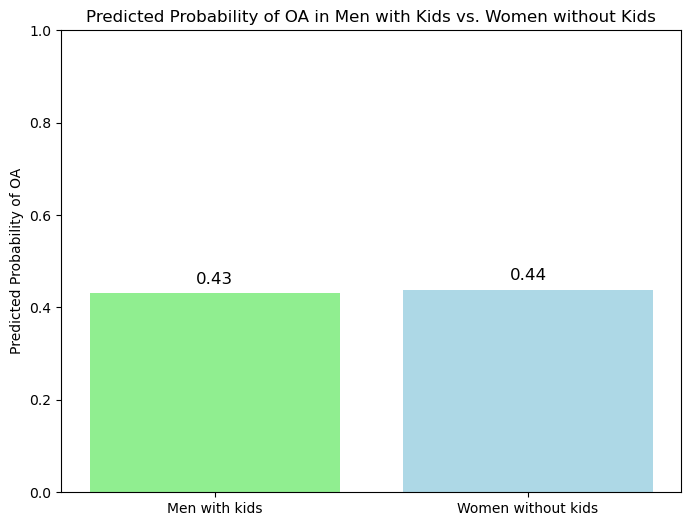

Odds ratio for sex (Men with kids vs. Women without kids): 0.1876637224708914
P-value for sex: 0.13982789442908744
There is no statistically significant difference in the risk of OA between men with kids and women without kids.


In [ ]:
df_filtered = df[(df['sex'] == 0) & (df['has_kid'] == 1) | (df['sex'] == 1) & (df['has_kid'] == 0)]


y = df_filtered['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: sex (men vs. women) + confounders (age, bmi, level_education, N_disease)
X = df_filtered[['sex', 'age', 'bmi', 'level_education', 'N_disease']]


X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())


df_filtered['predicted_prob'] = result.predict(X)


mean_prob_men_with_kid = df_filtered[df_filtered['sex'] == 0]['predicted_prob'].mean()
mean_prob_women_without_kid = df_filtered[df_filtered['sex'] == 1]['predicted_prob'].mean()


plt.figure(figsize=(8, 6))


categories = ['Men with kids', 'Women without kids']
probs = [mean_prob_men_with_kid, mean_prob_women_without_kid]

plt.bar(categories, probs, color=['lightgreen', 'lightblue'])
plt.ylim(0, 1)
plt.ylabel('Predicted Probability of OA')
plt.title('Predicted Probability of OA in Men with Kids vs. Women without Kids')


for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


odds_ratio = result.params['sex']
p_value = result.pvalues['sex']

print(f"Odds ratio for sex (Men with kids vs. Women without kids): {odds_ratio}")
print(f"P-value for sex: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the risk of OA between men with kids and women without kids.")
else:
    print("There is no statistically significant difference in the risk of OA between men with kids and women without kids.")

#### 7. Is the OA risk burden dose (number of kids) dependent in woman? alfa = ?

In [171]:
print("Number of kids in all cases: ", df.N_kids.value_counts())
df_women = df[df['sex'] == 1]

n_kids_counts_women = df_women['N_kids'].value_counts()
n_kids_counts_women
print("------------------------------------------")
print('number of kids in women:', n_kids_counts_women)
print("------------------------------------------")
# Number of kids in women with OA
df_women_with_OA = df[(df['sex'] == 1) & (df['OA'] == 1)]
x = df_women_with_OA['N_kids'].value_counts()
print("Number of kids in women with OA:", x)

Number of kids in all cases:  N_kids
2.0    2282
1.0    1201
3.0     836
0.0     632
4.0     368
Name: count, dtype: int64
------------------------------------------
number of kids in women: N_kids
2.0    1158
1.0     618
3.0     413
0.0     319
4.0     170
Name: count, dtype: int64
------------------------------------------
Number of kids in women with OA: N_kids
2.0    609
1.0    282
3.0    221
0.0    140
4.0     88
Name: count, dtype: int64


Optimization terminated successfully.
         Current function value: 0.689878
         Iterations 4
Slope (α) of the graph: 0.11544683395668519


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/2597598103.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['predicted_prob'] = result.predict()


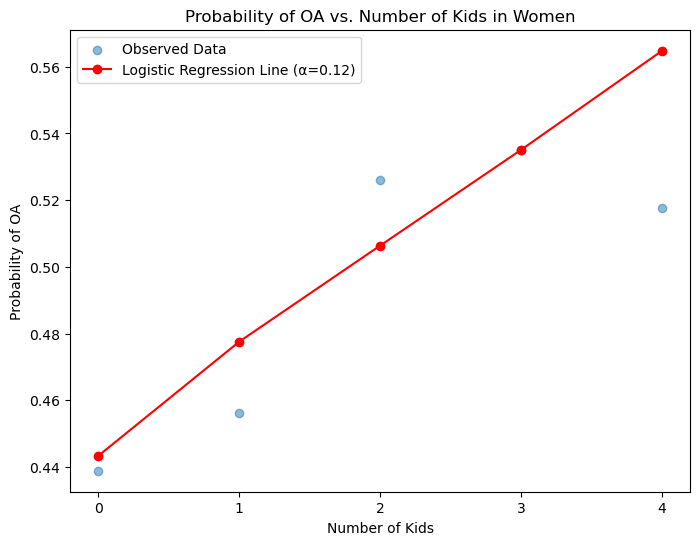

Odds ratio for N_kids: 0.11544683395668519
P-value for N_kids: 0.0020657303193723836
There is a statistically significant association between the number of kids and the risk of OA.


In [ ]:
df_women = df[df['sex'] == 1]


y = df_women['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: N_kids (prognostic factor) + confounders (age, bmi, level_education, N_disease)
X = df_women[['N_kids', 'level_education']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


alpha = result.params['N_kids']
print(f"Slope (α) of the graph: {alpha}")


df_women['predicted_prob'] = result.predict()


grouped_probs = df_women.groupby('N_kids')['predicted_prob'].mean()
grouped_OA = df_women.groupby('N_kids')['OA'].mean()


plt.figure(figsize=(8, 6))


plt.scatter(grouped_OA.index, grouped_OA.values, alpha=0.5, label='Observed Data')


plt.plot(grouped_probs.index, grouped_probs.values, color='red', marker='o', linestyle='-', label=f'Logistic Regression Line (α={alpha:.2f})')

plt.xlabel('Number of Kids')
plt.ylabel('Probability of OA')
plt.xticks([0, 1, 2, 3, 4]) 
plt.title('Probability of OA vs. Number of Kids in Women')
plt.legend()

plt.show()


odds_ratio = result.params['N_kids']
p_value = result.pvalues['N_kids']

print(f"Odds ratio for N_kids: {odds_ratio}")
print(f"P-value for N_kids: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant association between the number of kids and the risk of OA.")
else:
    print("There is no statistically significant association between the number of kids and the risk of OA.")

#### 8. Is the OA risk burden dose (number of kids) dependent in men? alfa = ?

In [173]:
print("Number of kids in all cases: ", df.N_kids.value_counts())
df_men = df[df['sex'] == 0]

n_kids_counts_men = df_men['N_kids'].value_counts()
n_kids_counts_men
print("------------------------------------------")
print('number of kids in men:', n_kids_counts_men)
print("------------------------------------------")
# Number of kids in men with OA
df_men_with_OA = df[(df['sex'] == 0) & (df['OA'] == 1)]
x = df_men_with_OA['N_kids'].value_counts()
print("Number of kids in men with OA:", x)

Number of kids in all cases:  N_kids
2.0    2282
1.0    1201
3.0     836
0.0     632
4.0     368
Name: count, dtype: int64
------------------------------------------
number of kids in men: N_kids
2.0    1124
1.0     583
3.0     423
0.0     313
4.0     198
Name: count, dtype: int64
------------------------------------------
Number of kids in men with OA: N_kids
2.0    492
1.0    251
3.0    183
0.0    116
4.0     79
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/567997269.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['predicted_prob'] = result.predict()


Optimization terminated successfully.
         Current function value: 0.654022
         Iterations 5
Slope (α) of the graph: 0.020444643023992595


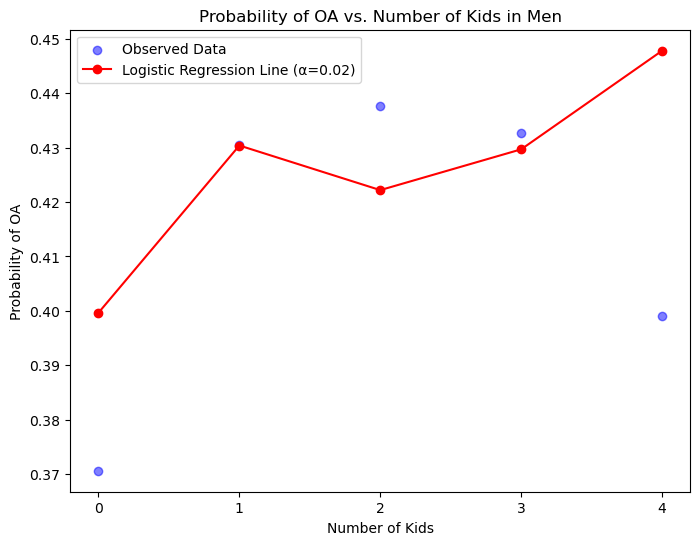

Odds ratio for N_kids: 0.020444643023992595
P-value for N_kids: 0.5930480145684911
There is no statistically significant association between the number of kids and the risk of OA in men.


In [174]:
df_men = df[df['sex'] == 0]


y = df_men['OA']  # Outcome variable: OA (1 = has OA, 0 = no OA)

# Independent variables: N_kids (prognostic factor) + confounders (age, bmi, level_education, N_disease)
X = df_men[['N_kids', 'age', 'level_education', 'N_disease']]


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


alpha = result.params['N_kids']
print(f"Slope (α) of the graph: {alpha}")


df_men['predicted_prob'] = result.predict()


grouped_probs = df_men.groupby('N_kids')['predicted_prob'].mean()
grouped_OA = df_men.groupby('N_kids')['OA'].mean()


plt.figure(figsize=(8, 6))


plt.scatter(grouped_OA.index, grouped_OA.values, alpha=0.5, label='Observed Data', color='blue')


plt.plot(grouped_probs.index, grouped_probs.values, color='red', marker='o', linestyle='-', label=f'Logistic Regression Line (α={alpha:.2f})')

plt.xlabel('Number of Kids')
plt.ylabel('Probability of OA')
plt.xticks([0, 1, 2, 3, 4])  
plt.title('Probability of OA vs. Number of Kids in Men')
plt.legend()

plt.show()


odds_ratio = result.params['N_kids']
p_value = result.pvalues['N_kids']

print(f"Odds ratio for N_kids: {odds_ratio}")
print(f"P-value for N_kids: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant association between the number of kids and the risk of OA in men.")
else:
    print("There is no statistically significant association between the number of kids and the risk of OA in men.")


Optimization terminated successfully.
         Current function value: 0.689878
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.654022
         Iterations 5


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/890637426.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['predicted_prob'] = result_women.predict()
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_5697/890637426.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['predicted_prob'] = result_men.predict()


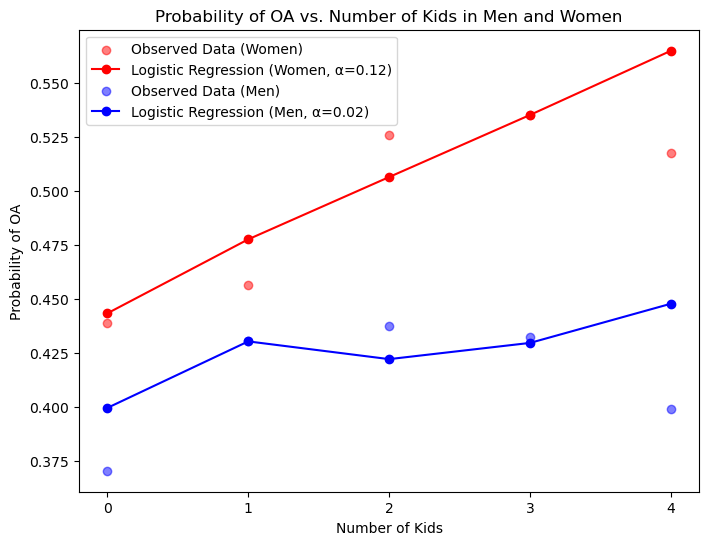

Odds ratio for N_kids (Women): 0.11544683395668519
P-value for N_kids (Women): 0.0020657303193723836
Odds ratio for N_kids (Men): 0.020444643023992595
P-value for N_kids (Men): 0.5930480145684911
There is a statistically significant association between the number of kids and the risk of OA in women.
There is no statistically significant association between the number of kids and the risk of OA in men.


In [175]:
df_women = df[df['sex'] == 1]
df_men = df[df['sex'] == 0]


y_women = df_women['OA']
X_women = df_women[['N_kids', 'level_education']]
X_women = sm.add_constant(X_women)
logit_model_women = sm.Logit(y_women, X_women)
result_women = logit_model_women.fit()

y_men = df_men['OA']
X_men = df_men[['N_kids', 'age', 'level_education', 'N_disease']]
X_men = sm.add_constant(X_men)
logit_model_men = sm.Logit(y_men, X_men)
result_men = logit_model_men.fit()


alpha_women = result_women.params['N_kids']
alpha_men = result_men.params['N_kids']


df_women['predicted_prob'] = result_women.predict()
df_men['predicted_prob'] = result_men.predict()


grouped_probs_women = df_women.groupby('N_kids')['predicted_prob'].mean()
grouped_OA_women = df_women.groupby('N_kids')['OA'].mean()

grouped_probs_men = df_men.groupby('N_kids')['predicted_prob'].mean()
grouped_OA_men = df_men.groupby('N_kids')['OA'].mean()


plt.figure(figsize=(8, 6))


plt.scatter(grouped_OA_women.index, grouped_OA_women.values, alpha=0.5, label='Observed Data (Women)', color='red')


plt.plot(grouped_probs_women.index, grouped_probs_women.values, color='red', marker='o', linestyle='-', label=f'Logistic Regression (Women, α={alpha_women:.2f})')


plt.scatter(grouped_OA_men.index, grouped_OA_men.values, alpha=0.5, label='Observed Data (Men)', color='blue')

plt.plot(grouped_probs_men.index, grouped_probs_men.values, color='blue', marker='o', linestyle='-', label=f'Logistic Regression (Men, α={alpha_men:.2f})')

plt.xlabel('Number of Kids')
plt.ylabel('Probability of OA')
plt.xticks([0, 1, 2, 3, 4])  
plt.title('Probability of OA vs. Number of Kids in Men and Women')
plt.legend()

plt.show()


odds_ratio_women = result_women.params['N_kids']
odds_ratio_men = result_men.params['N_kids']
p_value_women = result_women.pvalues['N_kids']
p_value_men = result_men.pvalues['N_kids']

print(f"Odds ratio for N_kids (Women): {odds_ratio_women}")
print(f"P-value for N_kids (Women): {p_value_women}")
print(f"Odds ratio for N_kids (Men): {odds_ratio_men}")
print(f"P-value for N_kids (Men): {p_value_men}")

if p_value_women < 0.05:
    print("There is a statistically significant association between the number of kids and the risk of OA in women.")
else:
    print("There is no statistically significant association between the number of kids and the risk of OA in women.")

if p_value_men < 0.05:
    print("There is a statistically significant association between the number of kids and the risk of OA in men.")
else:
    print("There is no statistically significant association between the number of kids and the risk of OA in men.")


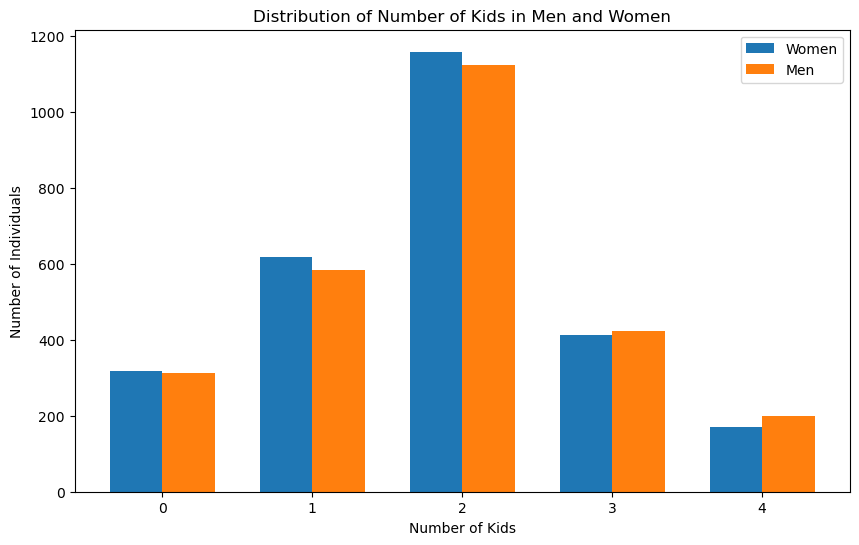

In [ ]:
df_women = df[df['sex'] == 1]
df_men = df[df['sex'] == 0]

n_kids_counts_women = df_women['N_kids'].value_counts().sort_index()
n_kids_counts_men = df_men['N_kids'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = n_kids_counts_women.index
plt.bar(index - bar_width/2, n_kids_counts_women, bar_width, label='Women')
plt.bar(index + bar_width/2, n_kids_counts_men, bar_width, label='Men')


plt.xlabel('Number of Kids')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Number of Kids in Men and Women')
plt.xticks(index)
plt.legend()


plt.show()